In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
iris = pd.read_csv('data/iris.data', header=None)

In [5]:
type(iris)

pandas.core.frame.DataFrame

In [6]:
iris[:5]

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris.values[:5]

array([[5.1, 3.5, 1.4, 0.2, 'Iris-setosa'],
       [4.9, 3.0, 1.4, 0.2, 'Iris-setosa'],
       [4.7, 3.2, 1.3, 0.2, 'Iris-setosa'],
       [4.6, 3.1, 1.5, 0.2, 'Iris-setosa'],
       [5.0, 3.6, 1.4, 0.2, 'Iris-setosa']], dtype=object)

In [18]:
X = iris.values[:, 0:4].astype('float32')
y = iris.values[:, 4]

In [10]:
X.shape, X.dtype

((150, 4), dtype('float32'))

In [11]:
y.shape, y.dtype

((150,), dtype('O'))

유형(class)

In [14]:
np.unique(y)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

데이터 시각화

In [ ]:
x1 = X[:, 0]
x3 = X[:, 2]

In [36]:
분류색상 = np.where(y == 'Iris-setosa', 0, y)
분류색상 = np.where(분류색상 == 'Iris-versicolor', 1, 분류색상)
분류색상 = np.where(y == 'Iris-virginica', 2, 분류색상)

In [37]:
np.unique(분류색상)

array([0, 1, 2], dtype=object)

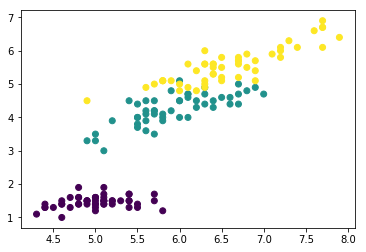

In [23]:
plt.scatter(x1, x3, c=분류색상)

산점도 행렬

한번에 두 개씩 모든 특징의 조합들을 산점도로 출력

In [32]:
iris.columns = ['x1', 'x2', 'x3', 'x4', 'label']

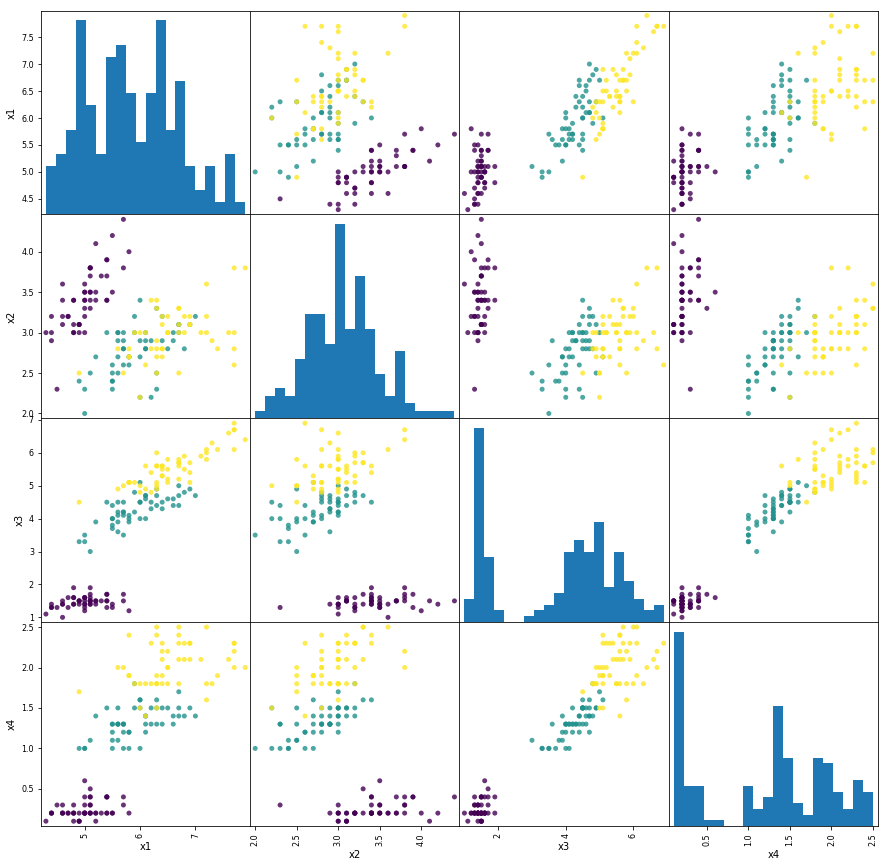

In [33]:
_= pd.plotting.scatter_matrix(iris, c=분류색상,
                              hist_kwds={'bins': 20},
                              figsize=(15, 15), s=100, alpha=0.8)

기계학습 모델 선택

In [38]:
from sklearn.neighbors import KNeighborsClassifier

모델 설정

In [39]:
model = KNeighborsClassifier()

모델 훈련 (지도학습)

In [47]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, shuffle= True, test_size=0.25)

In [69]:
X.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape

((150, 4), (112, 4), (38, 4), (150,), (112,), (38,))

In [70]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

"예측": 모델 활용

In [71]:
Xnew = np.array([[5.0, 2.9, 1.0, 0.2]])

In [72]:
Xnew.shape

(1, 4)

In [73]:
model.predict(Xnew)

array(['Iris-setosa'], dtype=object)

모델의 성능은 여러 개의 표본으로 측정할 필요가 있습니다.

In [74]:
y_test_pred = model.predict(X_test)

In [75]:
y_test_pred[:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

회귀 출력 예시 데이터셋

In [87]:
boston = pd.read_csv('data/boston.csv')

In [88]:
boston[:5]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,33.4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,36.2,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


#### 연습

주어진 데이터셋을 지도학습용으로 준비해 봅시다.

살펴볼 점

1. 샘플과 특징은 각각 몇 개씩인가요?
1. y 값의 범위는? 

지도학습용으로 데이터셋 가공

In [ ]:
y = boston.values[:, 0].astype('float32')
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

탐색적 데이터 분석

In [94]:
X.shape, y.shape

((506, 13), (506,))

In [96]:
y.min(), y.max(), y.mean()

(5.0, 50.0, 22.532806)

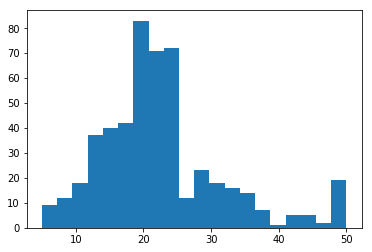

In [101]:
_ = plt.hist(y, bins=20)

기계학습 모델 선택

In [102]:
from sklearn.neighbors import KNeighborsRegressor

In [105]:
model = KNeighborsRegressor(n_neighbors=1)

In [106]:
model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=1, p=2,
          weights='uniform')

In [107]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [109]:
y_test_pred[:5]

array([ 22.70000076,  17.10000038,  24.79999924,  21.89999962,  14.60000038], dtype=float32)

회귀용 평가 지표

In [110]:
from sklearn.metrics import r2_score

In [111]:
훈련점수 = r2_score(y_train, y_train_pred)
시험점수 = r2_score(y_test, y_test_pred)
훈련점수, 시험점수

(1.0, 0.35527303745511107)

분류 데이터셋 예시: 종양 데이터셋

In [114]:
cancer = pd.read_csv('data/cancer.csv')

In [115]:
cancer[:5]

,type,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [116]:
종양 = cancer.values[:, 0]

In [117]:
np.unique(종양)

array(['benign', 'malignant'], dtype=object)

In [118]:
cancer.shape

(569, 31)

In [119]:
y = cancer.values[:, 0]
X = cancer.values[:, 1:].astype('float32')

In [120]:
X.shape, y.shape

((569, 30), (569,))

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [122]:
from sklearn.neighbors import KNeighborsClassifier

In [123]:
model = KNeighborsClassifier()
model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [124]:
model = model.fit(X_train, y_train)

In [126]:
훈련점수 = model.score(X_train, y_train)
시험점수 = model.score(X_test, y_test)

In [127]:
훈련점수, 시험점수

(0.94131455399061037, 0.95804195804195802)

모델 설정에 따른 성능 평가

"이웃수에 따라서 점수가 어떻게 바뀔까?"

In [128]:
이웃수_범위 = list(range(1, 11))
이웃수_범위

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [129]:
훈련결과 = {}
for 이웃수 in 이웃수_범위:
    model = KNeighborsClassifier(n_neighbors=이웃수)
    model.fit(X_train, y_train)
    훈련점수 = model.score(X_train, y_train)
    시험점수 = model.score(X_test, y_test)
    훈련결과[이웃수] = {'train': 훈련점수, 'test': 시험점수}

In [131]:
훈련결과표 = pd.DataFrame(훈련결과).T
훈련결과표

,test,train
1,0.937063,1.000000
2,0.930070,0.943662
3,0.951049,0.950704
4,0.944056,0.946009
5,0.958042,0.941315
6,0.951049,0.941315
7,0.951049,0.936620
8,0.944056,0.931925
9,0.951049,0.934272
10,0.944056,0.931925


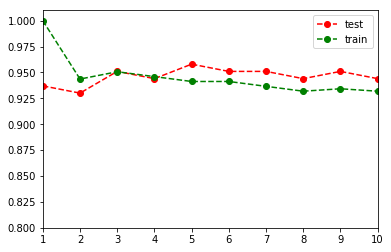

In [133]:
style = {'train': 'go--', 'test': 'ro--'}
훈련결과표.plot(style=style, ylim=(0.8, 1.01))

#### 연습

주어진 데이터에 대해 kNN 모델의 최적 설정을 찾아봅시다.

1. "최적" 점수에 만족하시나요?

In [138]:
boston[:3]

,Price,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,24.0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,21.6,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,34.7,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [139]:
boston.values[:3]

array([[  2.40000000e+01,   6.32000000e-03,   1.80000000e+01,
          2.31000000e+00,   0.00000000e+00,   5.38000000e-01,
          6.57500000e+00,   6.52000000e+01,   4.09000000e+00,
          1.00000000e+00,   2.96000000e+02,   1.53000000e+01,
          3.96900000e+02,   4.98000000e+00],
       [  2.16000000e+01,   2.73100000e-02,   0.00000000e+00,
          7.07000000e+00,   0.00000000e+00,   4.69000000e-01,
          6.42100000e+00,   7.89000000e+01,   4.96710000e+00,
          2.00000000e+00,   2.42000000e+02,   1.78000000e+01,
          3.96900000e+02,   9.14000000e+00],
       [  3.47000000e+01,   2.72900000e-02,   0.00000000e+00,
          7.07000000e+00,   0.00000000e+00,   4.69000000e-01,
          7.18500000e+00,   6.11000000e+01,   4.96710000e+00,
          2.00000000e+00,   2.42000000e+02,   1.78000000e+01,
          3.92830000e+02,   4.03000000e+00]])

In [135]:
y = boston.values[:, 0].astype('float32')
X = boston.values[:, 1:].astype('float32')

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [136]:
train_results = {}
for 이웃수 in range(1, 11):
    model = KNeighborsRegressor(n_neighbors=이웃수).fit(X_train, y_train)
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    train_results[이웃수] = {'train': train_score, 'test': test_score}

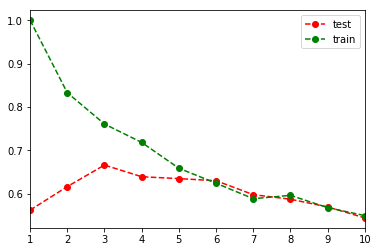

In [137]:
훈련결과표 = pd.DataFrame(train_results).T
훈련결과표.plot(style=style)

# 선형모델

## 1943 MCP 뉴런

인공지능의 기원. 21세기 딥러닝에서도 여전히 기본 단위로 사용됩니다.

In [145]:
x = np.array([0.1, 0.1, 0.1])

단계1: 입력에는 가중치(weight)가 부여됩니다.

In [146]:
w = np.array([0.1, 1.0, 0.0])

In [147]:
x * w

array([ 0.01,  0.1 ,  0.  ])

단계2: 취합

In [149]:
z = np.sum(x*w)
z

0.11000000000000001

단계3: 활성화

출력을 결정합니다.

In [150]:
b = 임계점 = 0.2

In [151]:
y = 1 if z > b else -1
y

-1

MCP 뉴런을 활용한 논리회로

In [152]:
def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = 0.7
    # MCP 뉴런
    z = np.sum(x*w)
    y = 1 if z > b else -1
    return y

In [153]:
def test(logic):
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [154]:
test(AND)

0 0 | -1
0 1 | -1
1 0 | -1
1 1 | 1


In [155]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = -0.7
    # MCP 뉴런
    z = np.sum(x*w)
    y = 1 if z > b else -1
    return y

In [156]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | -1
